# Part 6 - Standard Geography Queries

In [1]:
# Import Libraries
import sys
sys.path.insert(0, r"C:\ipython_workfolder\geosaurus\src")
from arcgis.gis import GIS
from arcgis.geoenrichment import Country, enrich, service_limits, standard_geography_query

In [2]:
# Create a GIS Connection
gis = GIS(profile='your_online_profile')

In [3]:
# Get Country
usa = Country.get('USA')

## Standard Geography Queries


Previously, you learned that a `study area` is used to define the location of the point or area that you want to enrich with additional information. Now, you will be introduced a new form of `study area` - the `Standard Geography Area` which lets you define an area by the ID of a standard geographic statistical feature, such as a census or postal area. For example, to obtain enrichment information for a U.S. state, county or ZIP Code or a Canadian province or postal code. The most common workflow for this service is to find a FIPS (standard geography ID) for a geographic name.

`standard_geography_query` method allows you to query for standard geography IDs and features at the supported geographic levels, and then they can be used to obtain facts about the location using the `enrich` method or create reports using `create_report`.

### Using Standard Geography Query

Let's look at an example to find the standard geography ID for all Orange counties in U.S. We will then use one of these IDs and `enrich()` the area with information from `Age` data collection.

We will use `US` as the source country and specify `US.Counties` as the standard geographic layer to be queried since we are looking for Orange counties across U.S. We will use `orange` as the text for the service to query.

In [4]:
# Find FIPS for all Orange counties in US
orange = standard_geography_query(source_country='US', layers='US.Counties', geoquery='orange')
orange

,DatasetID,Hierarchy,DataLayerID,AreaID,AreaName,MajorSubdivisionName,MajorSubdivisionAbbr,MajorSubdivisionType,CountryAbbr,Score,ObjectId
0,USA_ESRI_2022,census2020,US.Counties,06059,Orange County,California,CA,State,US,100,1
1,USA_ESRI_2022,census2020,US.Counties,12095,Orange County,Florida,FL,State,US,100,2
2,USA_ESRI_2022,census2020,US.Counties,18117,Orange County,Indiana,IN,State,US,100,3
3,USA_ESRI_2022,census2020,US.Counties,36071,Orange County,New York,NY,State,US,100,4
4,USA_ESRI_2022,census2020,US.Counties,37135,Orange County,North Carolina,NC,State,US,100,5
5,USA_ESRI_2022,census2020,US.Counties,48361,Orange County,Texas,TX,State,US,100,6
6,USA_ESRI_2022,census2020,US.Counties,50017,Orange County,Vermont,VT,State,US,100,7
7,USA_ESRI_2022,census2020,US.Counties,51137,Orange County,Virginia,VA,State,US,100,8


The resulting dataframe shows `DatasetID, DataLayerID` which are the IDs for dataset and layer being queried. `AreaID` is the unique ID for each area in the results. `AreaName` is Orange County as we looked for Orange counties across U.S. `MajorSubdivisionName, MajorSubdivisionAbbr and MajorSubdivisionType` show the type of major subdivision i.e. `State` along with state name and abbrevation.

 #### Enrich using results from Standard Geography Query

The `standard_geography_query` returns a list of Orange counties for different states, with the state name shown as field `MajorSubdivisionName`. Now, let's `enrich()` Orange County in California using `AreaID: 06059`.

In [5]:
or_ca = {"sourceCountry":"USA","layer":"US.Counties","ids":["06059"]}

In [6]:
orange_df = enrich(study_areas=[or_ca], data_collections=['Age'] )
orange_df

,std_geography_level,std_geography_name,std_geography_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,male5,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,US.Counties,Orange County,06059,USA,Query:US.Counties,2.191,2.576,1,91982.0,98448.0,...,101687.0,103434.0,102664.0,97504.0,83897.0,69548.0,51668.0,34279.0,38856.0,"{""rings"": [[[-117.91957212396069, 33.947640862..."


In [7]:
orange_df.columns

Index(['std_geography_level', 'std_geography_name', 'std_geography_id',
       'source_country', 'aggregation_method',
       'population_to_polygon_size_rating', 'apportionment_confidence',
       'has_data', 'male0', 'male5', 'male10', 'male15', 'male20', 'male25',
       'male30', 'male35', 'male40', 'male45', 'male50', 'male55', 'male60',
       'male65', 'male70', 'male75', 'male80', 'male85', 'fem0', 'fem5',
       'fem10', 'fem15', 'fem20', 'fem25', 'fem30', 'fem35', 'fem40', 'fem45',
       'fem50', 'fem55', 'fem60', 'fem65', 'fem70', 'fem75', 'fem80', 'fem85',
       'SHAPE'],
      dtype='object')

Enrichment using `Age` data collection resulted in many columns for various age groups. Other columns such as Standard Geography ID, Name, Level, country, and populationToPolygonSizeRating were also added with enrichment.

#### Visualize on a Map
Let's visualize the enriched geography on a map.

In [8]:
or_ca_map = gis.map('Los Angeles, CA')
or_ca_map

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
orange_df.spatial.plot(or_ca_map)

True

### Customizing your Query

`geoquery` parameter is used to specify the search criteria in order to query for the standard geography layers desired. A query is broken up into terms and operators. Multiple terms can be combined together with Boolean operators to form more complex queries. Learn more about using `geoquery` to create more complex queries [here](https://developers.arcgis.com/rest/geoenrichment/api-reference/standard-geography-query.htm).

Let's look at an example of grouping the search terms to find all `Orange or Lake` counties in US. Search supports using parentheses to group clauses to form subqueries. This can be useful if you want to control the Boolean logic for a query. 

In [10]:
or_lake = standard_geography_query(source_country='US', layers='US.Counties', geoquery='(Orange OR Lake)')
or_lake

,DatasetID,Hierarchy,DataLayerID,AreaID,AreaName,MajorSubdivisionName,MajorSubdivisionAbbr,MajorSubdivisionType,CountryAbbr,Score,ObjectId
0,USA_ESRI_2022,census2020,US.Counties,06059,Orange County,California,CA,State,US,100,1
1,USA_ESRI_2022,census2020,US.Counties,12095,Orange County,Florida,FL,State,US,100,2
2,USA_ESRI_2022,census2020,US.Counties,18117,Orange County,Indiana,IN,State,US,100,3
3,USA_ESRI_2022,census2020,US.Counties,48361,Orange County,Texas,TX,State,US,100,4
4,USA_ESRI_2022,census2020,US.Counties,50017,Orange County,Vermont,VT,State,US,100,5
5,USA_ESRI_2022,census2020,US.Counties,51137,Orange County,Virginia,VA,State,US,100,6
6,USA_ESRI_2022,census2020,US.Counties,36071,Orange County,New York,NY,State,US,98,7
7,USA_ESRI_2022,census2020,US.Counties,37135,Orange County,North Carolina,NC,State,US,98,8
8,USA_ESRI_2022,census2020,US.Counties,06033,Lake County,California,CA,State,US,72,9
9,USA_ESRI_2022,census2020,US.Counties,08065,Lake County,Colorado,CO,State,US,72,10


We see that there are multiple Orange and Lake counties in US. Let's get the results for Orange or Lake county in California.

In [11]:
or_lake_ca = standard_geography_query(source_country='US', layers='US.Counties', geoquery='(Orange OR Lake) AND CA')
or_lake_ca

,DatasetID,Hierarchy,DataLayerID,AreaID,AreaName,MajorSubdivisionName,MajorSubdivisionAbbr,MajorSubdivisionType,CountryAbbr,Score,ObjectId
0,USA_ESRI_2022,census2020,US.Counties,06059,Orange County,California,CA,State,US,100,1
1,USA_ESRI_2022,census2020,US.Counties,06033,Lake County,California,CA,State,US,79,2


 #### Enrich using results from Standard Geography Query

The `standard_geography_query` gave us details of Orange and Lake counties in California. Now, let's `enrich()` these counties using `AreaID`.

In [12]:
or_lk = {"sourceCountry":"USA","layer":"US.Counties","ids":["06059","06033"]}

In [13]:
or_lake_df = enrich(study_areas=[or_lk], data_collections=['Age'] )
or_lake_df

,std_geography_level,std_geography_name,std_geography_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,male0,male5,...,fem45,fem50,fem55,fem60,fem65,fem70,fem75,fem80,fem85,SHAPE
0,US.Counties,Orange County,06059,USA,Query:US.Counties,2.191,2.576,1,91982.0,98448.0,...,101687.0,103434.0,102664.0,97504.0,83897.0,69548.0,51668.0,34279.0,38856.0,"{""rings"": [[[-117.91957212396069, 33.947640862..."
1,US.Counties,Lake County,06033,USA,Query:US.Counties,2.191,2.576,1,1735.0,1763.0,...,1867.0,2194.0,2700.0,3017.0,2871.0,2264.0,1545.0,923.0,933.0,"{""rings"": [[[-122.73907546229627, 39.383271047..."


#### Visualize on a Map
Let's visualize the enriched counties on a map.

In [14]:
or_lake_map = gis.map('California, US',6)
or_lake_map

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
or_lake_df.spatial.plot(or_lake_map)

True

## Data Apportionment

The GeoEnrichment service employs a sophisticated _geographic retrieval methodology_ to aggregate data called __Data Apportionment__. This methodology determines how data is gathered and summarized or aggregated for input features. 

For _standard geographic units_ such as states, provinces, counties, or postal codes, the link between a designated area and its attribute data is a simple one-to-one relationship. So, the data retrieval is a simple process of gathering the data for those areas.

The _non-standard geographic units_ such as ring buffers, drive-time service areas, and other non-standard  polygons, the geographic retrieval process is more complicated, because the input polygon may intersect geographic areas that contain data that needs to be aggregated. 

The GeoEnrichment service uses Weighted Centroid geographic retrieval to aggregate data for rings and other polygons. With this methodology, data points within an area of interest are weighted more heavily than points outside that area. When the service aggregates data, the results are statistically adjusted to more accurately reflect the actual statistics within the area of interest.

The GeoEnrichment service uses the most detailed geographies with the most recent census data, or authoritative estimates, available for commercial use from each country. For most countries, data is updated every two years, and a few countries are updated annually because data are readily available. Esri spreads the updates throughout the year on a quarterly basis. The data for each country are the most recently available estimates. 

### How Apportionment Works

The GeoEnrichment service uses a data apportionment algorithm to redistribute demographic, business, economic, and landscape variables to input polygon features. The algorithm analyzes each polygon to be enriched relative to a point dataset and a detailed dataset of reporting unit polygons that contain attributes for the selected variables. Based on how each polygon being enriched overlays these datasets, the algorithm determines the appropriate amount of each variable to assign.

Imagine you want to get statistics on total population for the study area represented by center polygon in this image.
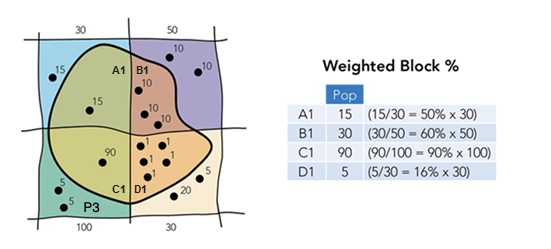

Source: https://developers.arcgis.com/rest/geoenrichment/api-reference/data-apportionment.htm


The other four polygons represent census geographies that contain total population values. In the United States, these can be Block Groups with enrichment data; in Canada, they can be Dissemination Areas.
The study area intersects 4 block groups that are partially inside the study area. Using area __P3__ as an example, the population weight for this area is determined by summing the block weights within this polygon. For example, if 90 percent of the P3 Blocks' population are within the study area, and the Total Population of P3 is 100 people, you can determine that 90 people in area P3 are inside the study area. 

So, for those partially included blocks, the GeoEnrichment service uses data apportionment and the weighted centroid retrieval method to calculate the approximate statistics for those portions of block groups inside the study area. It considers all the block points within each block group touched by the study area but weights the block points inside the study area more heavily.

You can learn more about Data Apportionment and how it works [here](https://developers.arcgis.com/rest/geoenrichment/api-reference/data-apportionment.htm).


## Service Limits

The GeoEnrichment service implements limits on users in order to guarantee accuracy and performance. The limits define the maximum size of a study area, maximum number of study areas, business records in an output, maximum drive time polygon size and many more. Exceeding these limits will cause your query to fail or be returned with a warning that you have exceeded one of these limits and will get results up until the limit is reached.

`service_limits()` method from `arcgis.geoenrichment` module can be used to discover and generate a list of service limits.

Let's look at all the service limits.

In [16]:
# Check service limits
service_limits()

,paramName,paramDescription,dataType,value
0,MaximumRingSize,Maximum size of rings for simple rings builders.,esriMiles,1000
1,MaximumRingSizeTime,Maximum size of rings (time units) for drive t...,esriDriveTimeUnitsMinutes,300
2,defaultFeaturesLimitPerComparisonLevel,Default maximum number of features to return p...,numeric,5
3,maxInterestingFactsCount,Maximum number of interesting facts to return.,numeric,1000
4,maxInterestingFactsHistogramSize,Maximum size of histogram to return.,numeric,100
5,maxRecordCount,Maximum number of features to return.,numeric,1000
6,maximumAttributeDescriptionLength,Maximum length of attribute’s description string.,numeric,1000
7,maximumDataCollections,Maximum number of data collections to return o...,numeric,1000
8,maximumDetailedMethodStudyAreasSize,Maximum size of rings for drive time/simple ri...,esriMiles,300
9,maximumDriveDistance,Maximum size of rings for drive time rings bui...,esriMiles,300


The __paramName__ shows maximum size, number, drive time etc. of a study area. The __paramDescription__ column details the description of each parameter name. The __dataType__ column shows the type of data for the parameter and the __value__ column shows the service limit.

`service_limits()` method returns a Pandas' DataFrame that describes the service's limitations for each input parameter. We can store the dataframe and use Pandas operations to subset and get results for specific service.

In [17]:
service_df = service_limits()

In [18]:
service_df.head()

,paramName,paramDescription,dataType,value
0,MaximumRingSize,Maximum size of rings for simple rings builders.,esriMiles,1000
1,MaximumRingSizeTime,Maximum size of rings (time units) for drive t...,esriDriveTimeUnitsMinutes,300
2,defaultFeaturesLimitPerComparisonLevel,Default maximum number of features to return p...,numeric,5
3,maxInterestingFactsCount,Maximum number of interesting facts to return.,numeric,1000
4,maxInterestingFactsHistogramSize,Maximum size of histogram to return.,numeric,100


In [19]:
service_df[service_df['paramName']=='MaximumRingSize']

,paramName,paramDescription,dataType,value
0,MaximumRingSize,Maximum size of rings for simple rings builders.,esriMiles,1000


## Conclusion

In this final part of the `arcgis.geoenrichment` module guide series, you have seen how the `standard_geography_query` method is used to query for standard geography areas which can then be used for enrichment, and it being customized to meet more complex search criteria when targeting at more specific results. You have also seen how Data Apportionment utilizes geographic retrieval methodology to aggregate data and how `service_limits()` can be used to generate a list of limits for different services.

In this guide series, we have demonstrated a majority of the functionality showcasing the power of `arcgis.geoenrichment` module in various ways. To look up the API reference doc for GeoEnrichment see [here](https://developers.arcgis.com/python/api-reference/arcgis.geoenrichment.html#).